<a href="https://colab.research.google.com/github/DanielleRaine/Bird-Species-Distribution-Modeling-with-Location-Information/blob/main/CLEAN_UP_NormalizationVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cleaned Normalization Evaluation Set

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Load into a DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)


Saving augmented_val.csv to augmented_val.csv


In [ ]:
print(df.shape)
print(df['num_different_species'].unique())

array([ 21,   8,  50,  31,  25,  34,  43,  42,  36,  11,  29,  46,  38,
        27,  30,  51,  17,  24,  37,  57,  35,  13,   7,  16,  62,  15,
        41,  14,  72,  67, 115,  74,  79,  22,  68,  26,  48,  44,  56,
        66,  60, 114, 108, 118,  40,  70,  64,  65,  53,   6,  47,  55,
        63,  45,  76,  87,  39,  19,  58,  32,  80,  33,  28,  99,  49,
        18,  71,  88, 106,  20,  77,  54,  73,  69,  52,  23,  83,  82,
        95,   2,  12,  75,  61,  85,  78, 126,  59, 123,  81,  10,  92,
        84,  98,  89,  94, 107, 113,   9,  97, 100, 155,  86,  91, 103,
       129, 137,   4,   3,   5,  90, 116, 138, 151, 143, 128,   1,   0,
        93, 125, 150, 127, 121, 136, 117,  96, 139, 135, 102, 104, 142,
       111, 110, 120, 109, 101, 119, 140, 133, 131, 180, 141, 105, 166,
       122, 112, 165, 164, 159, 145, 147, 154, 134, 153, 132, 146, 130,
       124, 152, 173, 160, 167, 179, 149, 163, 174, 168, 161, 156, 144,
       148, 239, 211, 157, 170, 181, 162, 171, 158, 192, 187, 18

In [ ]:
# Make a copy of the original dataframe
df2 = df.copy()

# Select only the numeric columns in the data for future visualizations prior to normalizing the data.
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Display the first few rows of the normalized data
print(df2.head())

   Unnamed: 0.1  Unnamed: 0 hotspot_id       lon       lat   county  \
0      0.000000    0.000000    L985833  0.662408  0.325464  Autauga   
1      0.000054    0.000097    L834447  0.644160  0.249155  Baldwin   
2      0.000107    0.000113    L834449  0.644346  0.248921  Baldwin   
3      0.000161    0.000129   L2117264  0.637445  0.266863  Baldwin   
4      0.000214    0.000145    L834450  0.644395  0.248912  Baldwin   

  county_code    state state_code  num_complete_checklists  ...    bio_19  \
0   US-AL-001  Alabama      US-AL                 0.011557  ...  0.275284   
1   US-AL-003  Alabama      US-AL                 0.000564  ...  0.268874   
2   US-AL-003  Alabama      US-AL                 0.000564  ...  0.270293   
3   US-AL-003  Alabama      US-AL                 0.005356  ...  0.290891   
4   US-AL-003  Alabama      US-AL                 0.000564  ...  0.271016   

     bdticm    bldfie    cecsol    clyppt    orcdrc    phihox    sltppt  \
0  0.016176  0.806246  0.060707  0.

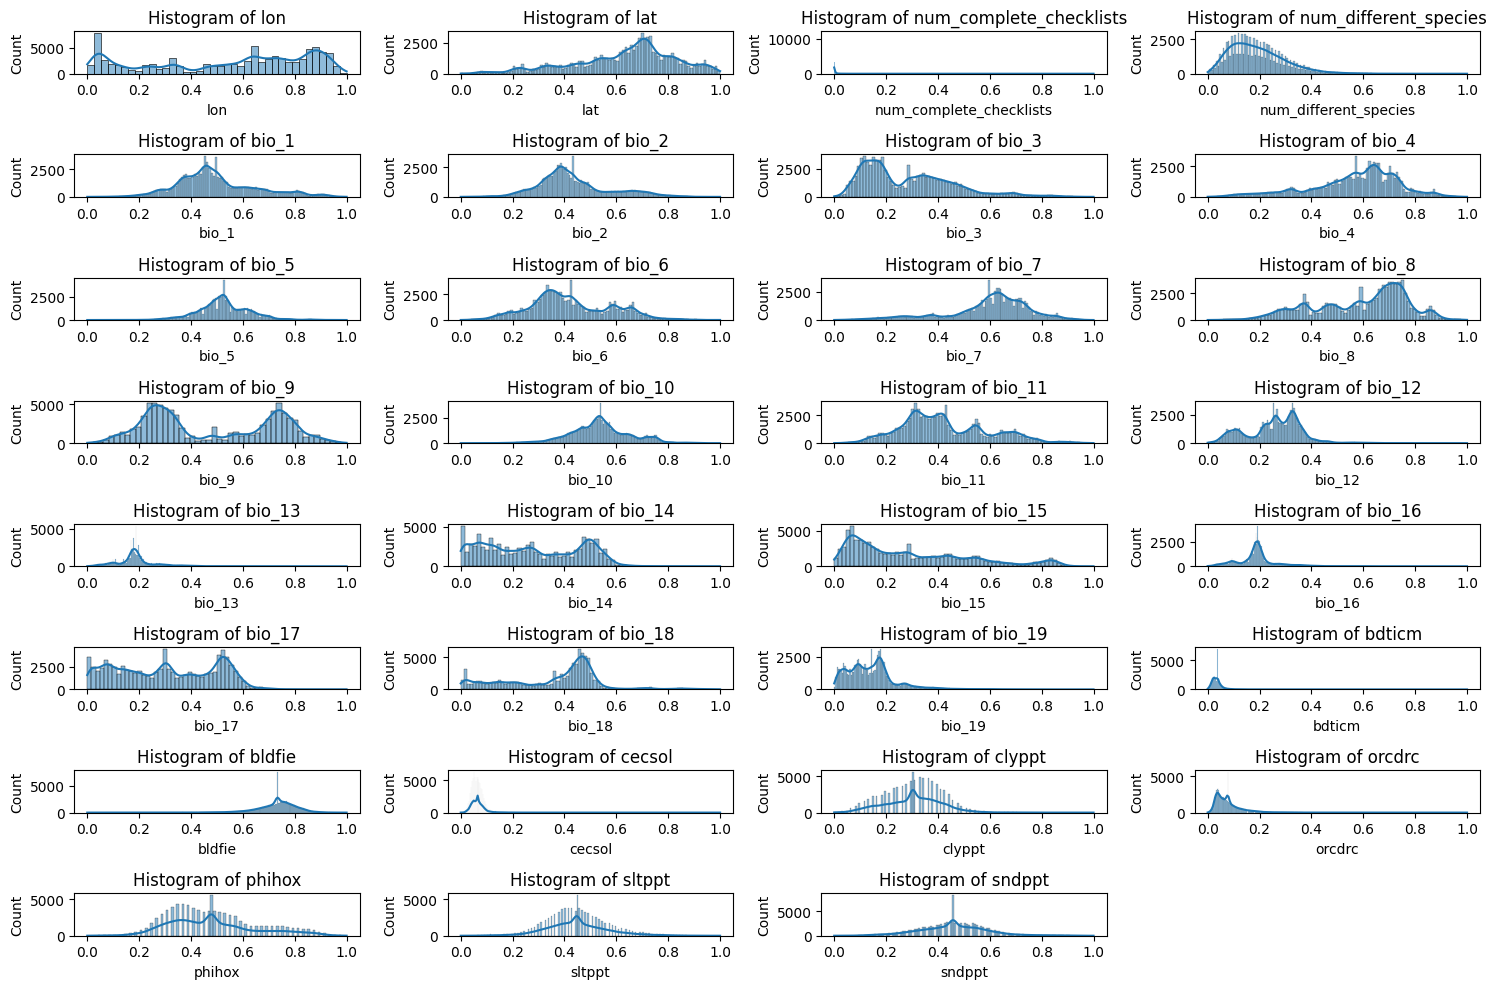

In [ ]:
# Create histograms for all normalized numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 4 + 1, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


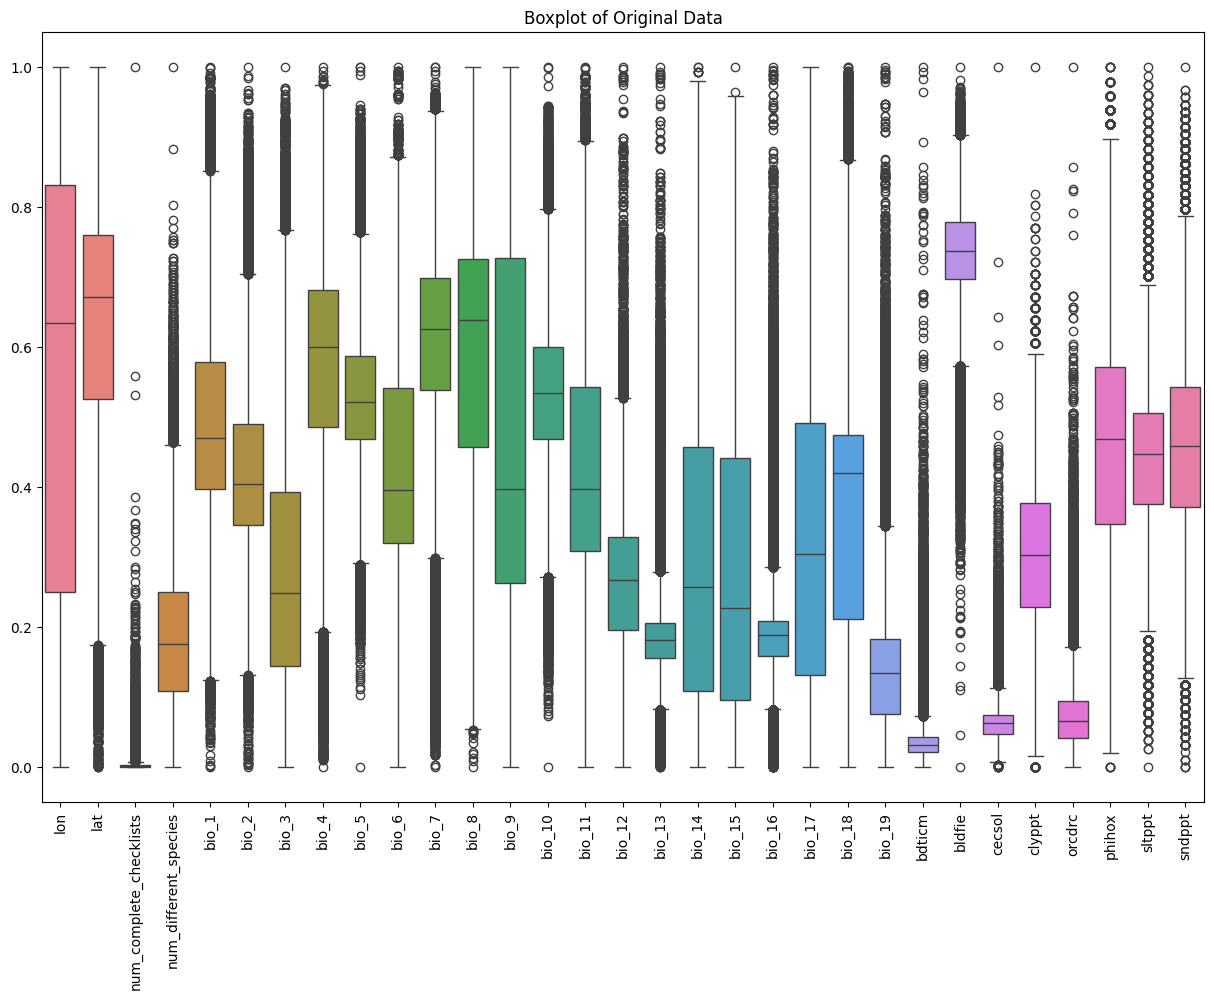

In [ ]:
# Create box plots for all normalized numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Original Data")
plt.show()

In [ ]:
# Find the median longitude and latitude in the augmented data set.
median_longitude = df2['lon'].median()
median_latitude = df2['lat'].median()


# Find the average longitude and latitude in the augmented data set.
mean_longitude = df2['lon'].mean()
mean_latitude = df2['lat'].mean()


# Display the median/mean longitude and latitudes. Round the results to the fourth decimal place. This gives for a feel of if the data may be heavily skewed.
print(f'The median longitude is {round(median_longitude, 4)} and the median latitude is {round(median_latitude, 4)}.')
print(f'The mean longitude is {round(mean_longitude, 4)} and the mean latitude is {round(mean_latitude, 4)}.')

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer


# Filter numeric columns (only int or float types)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Copy the original data to keep unchanged columns intact
transformed_data = df.copy()

# Apply skewness correction for each numeric column
for column in numeric_columns.columns:
    # Calculate the skewness of the column
    skewness = stats.skew(numeric_columns[column].dropna())  # Drop NaN to calculate skewness

    # Apply transformation based on the skewness
    if skewness > 1:
        # If positively skewed, apply log transformation (handle zeros separately)
        if (numeric_columns[column] > 0).all():  # Only apply log if all values are positive
            transformed_data[column] = np.log1p(numeric_columns[column])  # log(1 + X) to handle zero values
        else:
            # Apply Box-Cox if there are no zeros, add small constant to avoid zero issues
            transformed_data[column], _ = stats.boxcox(numeric_columns[column] + 1e-6)

    elif 0.5 < skewness <= 1:
        # Apply Yeo-Johnson transformation for moderately skewed data
        pt = PowerTransformer(method='yeo-johnson', standardize=False)
        transformed_data[column] = pt.fit_transform(numeric_columns[[column]])

    else:
        # If the skewness is low, leave the column as is (no transformation)
        transformed_data[column] = numeric_columns[column]

# Now, transformed_data contains the transformed numeric columns and any unchanged non-numeric columns
print(transformed_data.head())


   Unnamed: 0.1  Unnamed: 0 hotspot_id       lon       lat   county  \
0      0.000000    0.000000    L985833  0.662408  0.325464  Autauga   
1      0.000054    0.000097    L834447  0.644160  0.249155  Baldwin   
2      0.000107    0.000113    L834449  0.644346  0.248921  Baldwin   
3      0.000161    0.000129   L2117264  0.637445  0.266863  Baldwin   
4      0.000214    0.000145    L834450  0.644395  0.248912  Baldwin   

  county_code    state state_code  num_complete_checklists  ...    bio_19  \
0   US-AL-001  Alabama      US-AL                -8.844245  ... -1.019851   
1   US-AL-003  Alabama      US-AL               -25.232609  ... -1.034222   
2   US-AL-003  Alabama      US-AL               -25.232609  ... -1.031021   
3   US-AL-003  Alabama      US-AL               -11.814045  ... -0.985705   
4   US-AL-003  Alabama      US-AL               -25.232609  ... -1.029395   

     bdticm    bldfie    cecsol    clyppt    orcdrc    phihox    sltppt  \
0 -2.548395  0.806246 -2.003066  0.

In [ ]:
# Turn to csv
transformed_data.to_csv("normalized_val.csv", index = False)
files.download("normalized_val.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>